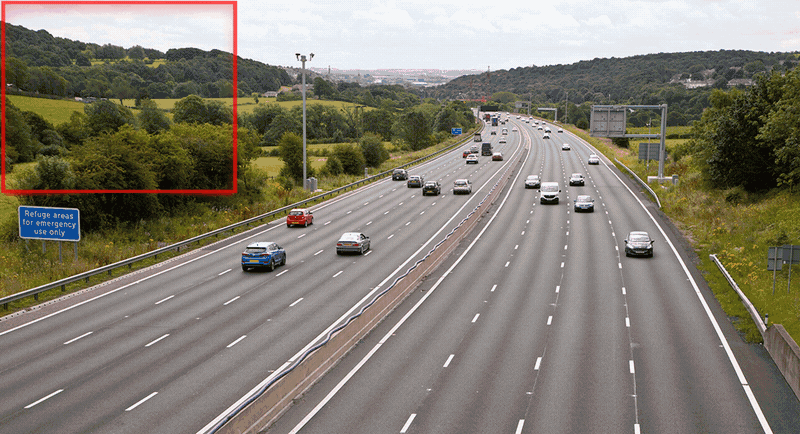

## Installing and Importing the required libraries

In [ ]:
!pip install -U torch sahi yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.0/956.0 KB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.

In [ ]:
import os
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/obss/sahi

## Unziping the data to GoogleColab

Mount the drive and specify the location of the zip folder containing the images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
path = '/content/drive/MyDrive/sample_data.zip'    ## Give the zipped image data path 
images_folder = '/content/data'
with ZipFile(path, 'r') as zip:
  print("extracting now")
  zip.extractall(images_folder)
  print("Check your directory.")

extracting now
Check your directory.


In [ ]:
# import shutil
# shutil.rmtree("/content/data/__MACOSX")

## Initializing the SAHI model.

Provide yolov5 model weights path along with all the other hyperparameters like slice width, slice height, overlap height and width ratio, also the path where you have unzipped the dataset zipped file. 

Slice height and slice width are dependent on the scale and size of the image and object respectively, for an image containg very small objects, choose a small slice height and slice width (128, 256) and small overlapping ratio (0.25, 0.35, 0.45)

In [ ]:
yolov5_model_path = "/content/drive/MyDrive/object detection/best (1).pt"     ## provide the yolov5 model weights path
model_type = "yolov5"
model_path = yolov5_model_path
model_device = "cuda:0" # or 'cuda:0'
model_confidence_threshold = 0.4
slice_height = 256
slice_width = 256
overlap_height_ratio = 0.25
overlap_width_ratio = 0.25
source_image_dir = "/content/data/sample_data"  ## path to the images directory

In [ ]:
## SAHI inference on the images 
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 6 listed files in folder: sample_data/


Performing inference on images:   0%|          | 0/6 [00:00<?, ?it/s]

Performing prediction on 36 number of slices.


Performing inference on images:  17%|█▋        | 1/6 [00:02<00:13,  2.68s/it]

Prediction time is: 2509.83 ms
Performing prediction on 36 number of slices.


Performing inference on images:  33%|███▎      | 2/6 [00:05<00:10,  2.51s/it]

Prediction time is: 2265.36 ms
Performing prediction on 36 number of slices.


Performing inference on images:  50%|█████     | 3/6 [00:07<00:07,  2.44s/it]

Prediction time is: 2260.03 ms
Performing prediction on 36 number of slices.


Performing inference on images:  67%|██████▋   | 4/6 [00:09<00:04,  2.42s/it]

Prediction time is: 2263.33 ms
Performing prediction on 36 number of slices.


Performing inference on images:  83%|████████▎ | 5/6 [00:12<00:02,  2.40s/it]

Prediction time is: 2258.17 ms
Performing prediction on 36 number of slices.


Performing inference on images: 100%|██████████| 6/6 [00:14<00:00,  2.44s/it]

Prediction time is: 2322.55 ms
Prediction results are successfully exported to runs/predict/exp


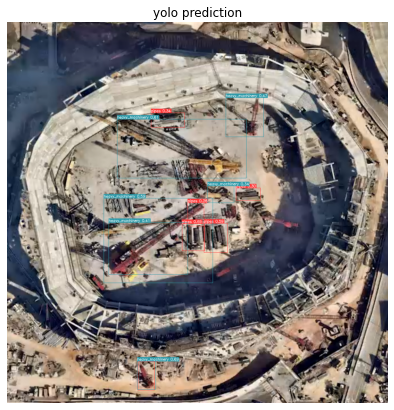

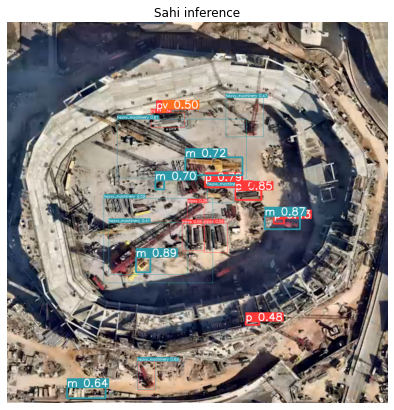

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (15, 15))
fig.add_subplot(1, 2, 1)
image = plt.imread("/content/data/sample_data/1.png")
plt.axis("off")
plt.imshow(image)
plt.title("yolo prediction")
plt.show()

fig = plt.figure(figsize = (15, 15))
fig.add_subplot(1, 2, 2)
sahi = plt.imread("/content/runs/predict/exp/visuals/1.png")
plt.axis("off")
plt.imshow(sahi)
plt.title("Sahi inference")
plt.show()